This is example code that reads and displays VISCO dataset.

[🌐 Project](https://visco-benchmark.github.io/) | [🤗 Dataset](https://huggingface.co/datasets/uclanlp/VISCO) | [📖 Paper](https://arxiv.org/abs/2412.02172)

<br/>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PlusLabNLP/VISCO/blob/main/browse-data.ipynb)

In [1]:
from huggingface_hub import hf_hub_download

fname = hf_hub_download(repo_id="uclanlp/VISCO", filename="test.jsonl", repo_type='dataset')
with open(fname, 'r') as f:
    lines = f.readlines()
print("Read %d lines" % len(lines))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Read 1645 lines


Display data 5

--- Question:
What is the center of symmetry of this function?
Choices:
(A) (0, 0)
(B) (-1, 0)
(C) (2, 0)

--- Label: (0, 0)

--- Model CoT:
1. A function with a center of symmetry at a point (a, b) implies the graph of the function is symmetric when rotated 180 degrees about this point.
2. Observing the graph, it appears that this symmetry exists around the point (2, 0).
3. Points on opposite sides of (2, 0) have values equidistant from this center, confirming symmetry around this point.
--- Model answer: (2, 0)

--- Critique:
1. Correct
  - Explanation 1: 
  - Explanation 2: 
  - Explanation 3: 
2. Incorrect
  - Explanation 1: The symmetry exists around (0, 0), not (2, 0).
  - Explanation 2: It's around (0,0)
  - Explanation 3: It is not symmetric around point (2, 0). Instead it obtains symmetry with point (0, 0).
3. Incorrect
  - Explanation 1: Points on opposite sides of (2, 0) do not have values equidistant from this center.
  - Explanation 2: Values that are locat

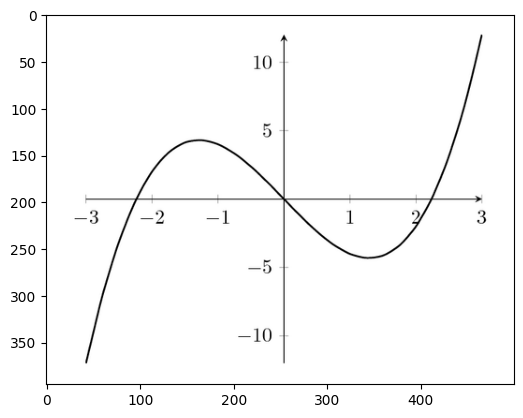

In [2]:
import json
import random
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

index = 5
print("Display data %d\n" % index)
line = json.loads(lines[index])

print("--- Question:")
print(line['question'])
print()

print("--- Label:", line['label'])
print()

print("--- Model CoT:")
for i in range(len(line['response']['reasoning'])):
    print("{:d}. {:s}".format(i + 1, line['response']['reasoning'][i]))
print("--- Model answer:", line['response']['answer'])
print()

print("--- Critique:")
for i in range(len(line['response']['reasoning'])):
    print("{:d}. {:s}".format(i + 1, "Correct" if line['reasoning_correctness'][i] else "Incorrect"))
    for j in range(3):  # three references for explanation
      print("  - Explanation {:d}:".format(j + 1), line['reasoning_critic'][i][j])
print("Answer:", "Correct" if line['answer_correctness']else "Incorrect")

plt.imshow(Image.open(BytesIO(base64.b64decode(line['image']))))
plt.show()